In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('house_prices.csv')
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
df.rename(columns={'Amount(in rupees)': 'Amount'}, inplace=True)
df.rename(columns={'Price (in rupees)': 'Price'}, inplace=True)

In [5]:
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.lower().strip().replace(',', '').replace('.', '')
        if 'lac' in valor:
            return float(valor.replace('lac', '')) * 100000
        elif 'cr' in valor:
            return float(valor.replace('cr', '')) * 100000
    try:
        return float(valor)
    except:
        return None

In [6]:
df['Amount'] = df['Amount'].apply(converter_valor)

In [7]:
df[['Floor Number', 'Total Number']] = df['Floor'].str.extract(r'(\d+)\s+out of\s+(\d+)').astype(float)
df.drop(['Floor', 'Index'], axis=1, inplace=True, errors='ignore')

df['Bathroom'] = df['Bathroom'].astype(str).str.replace('>', '').str.strip()
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')
df['Balcony'] = df['Balcony'].astype(str).str.replace('>', '').str.strip()
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce')

In [8]:
df.head()

,Title,Description,Amount,Price,location,Carpet Area,Status,Transaction,Furnishing,facing,...,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,Floor Number,Total Number
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,thane,500 sqft,Ready to Move,Resale,Unfurnished,NaN,...,Srushti Siddhi Mangal Murti Complex,1.0,2.0,NaN,NaN,NaN,NaN,NaN,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,thane,473 sqft,Ready to Move,Resale,Semi-Furnished,East,...,Dosti Vihar,2.0,NaN,1 Open,Freehold,NaN,NaN,NaN,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,thane,779 sqft,Ready to Move,Resale,Unfurnished,East,...,Sunrise by Kalpataru,2.0,NaN,1 Covered,Freehold,NaN,NaN,NaN,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,NaN,thane,530 sqft,Ready to Move,Resale,Unfurnished,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,thane,635 sqft,Ready to Move,Resale,Unfurnished,West,...,TenX Habitat Raymond Realty,2.0,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN,20.0,42.0


In [9]:
def tratando_nulos(df):
    print('Iniciando tratamento de valores nulos...')
    verificando_nulos = df.isnull().sum()
    colunas_removidas = []

    for coluna in df.columns:
        if verificando_nulos[coluna] > 50000:
            df.drop(coluna, axis=1, inplace=True)
            colunas_removidas.append(coluna)
        elif coluna == 'Price':
            media_price = df['Price'].mean()
            df['Price'] = df['Price'].fillna(media_price).round(1)
        elif coluna == 'Bathroom':
            moda = df['Bathroom'].mode()[0] if not df['Bathroom'].mode().empty else 0
            df['Bathroom'] = df['Bathroom'].fillna(moda)
        elif coluna == 'Balcony':
            moda = df['Balcony'].mode()[0] if not df['Balcony'].mode().empty else 0
            df['Balcony'] = df['Balcony'].fillna(moda)
        else:
            if df[coluna].dtype in ['float64', 'int64']:
                mediana = df[coluna].median()
                df[coluna] = df[coluna].fillna(mediana)
            else:
                df[coluna] = df[coluna].fillna('Não Informado')

    print(f'Colunas removidas (muito nulo): {colunas_removidas}')
    print('Tratamento de nulos concluído.\n')
    return df

In [10]:
df = tratando_nulos(df)

Iniciando tratamento de valores nulos...
Colunas removidas (muito nulo): ['Carpet Area', 'facing', 'overlooking', 'Society', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']
Tratamento de nulos concluído.



In [11]:
df_outliers = df.drop(columns=['Status', 'Transaction', 'Furnishing', 'location', 'Description', 'Title'], errors='ignore')

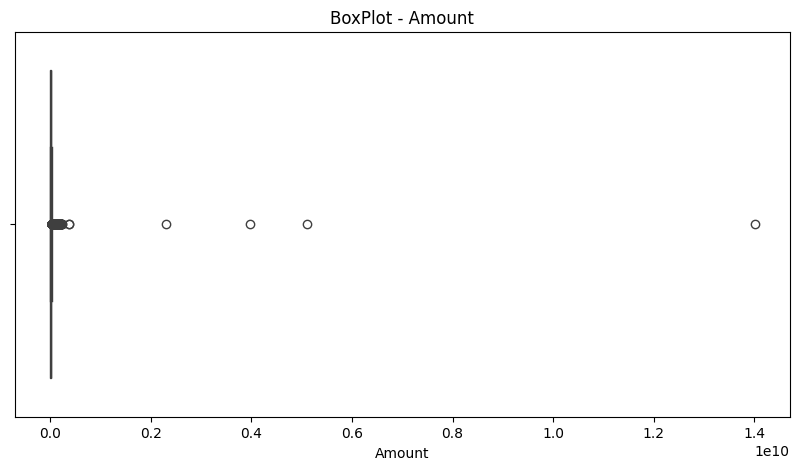

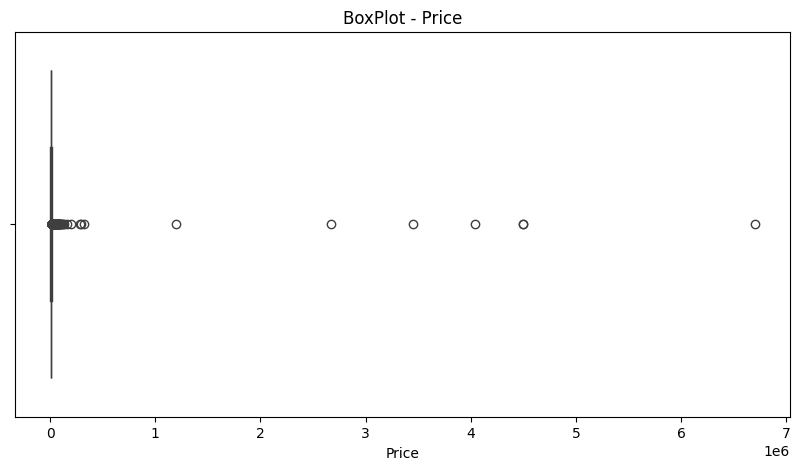

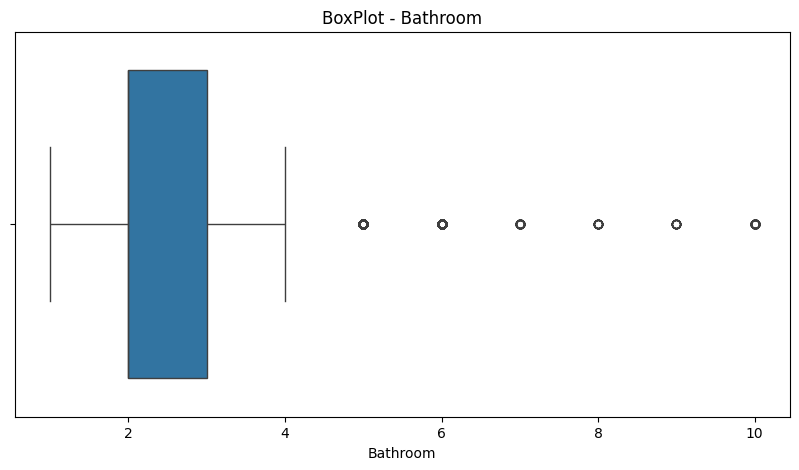

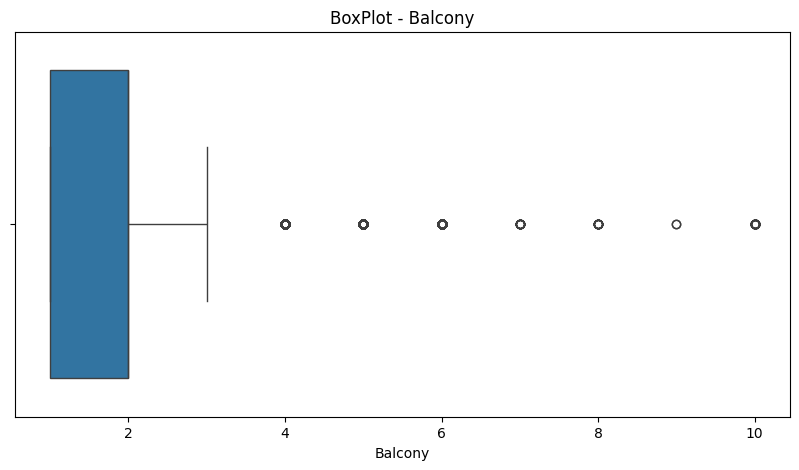

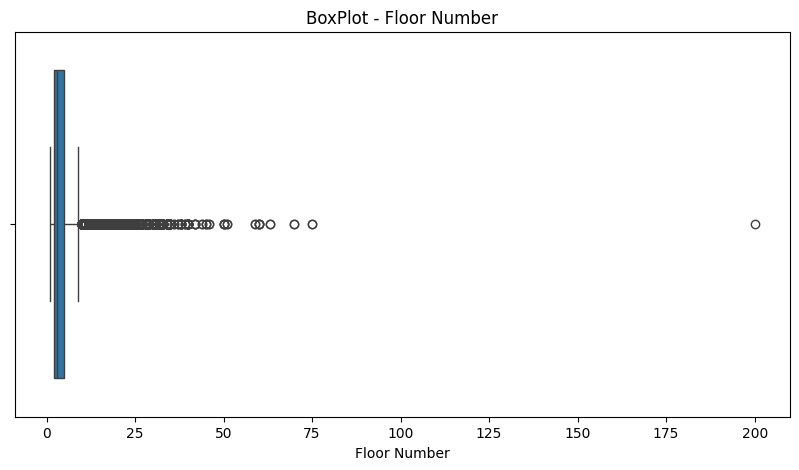

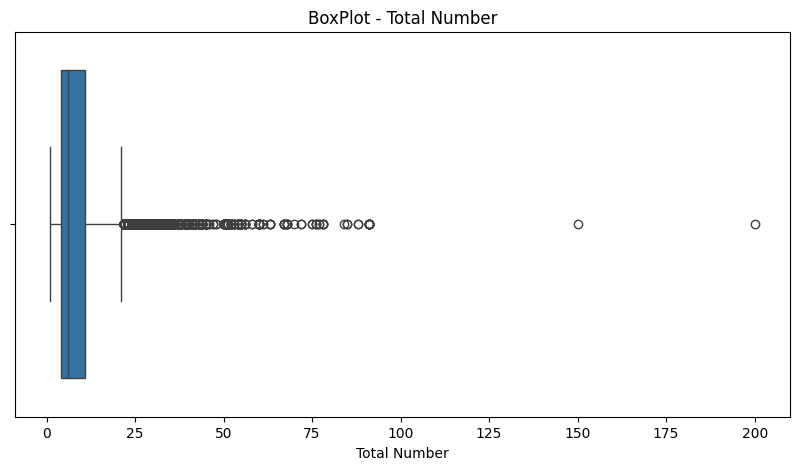

In [12]:
for coluna in df_outliers.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_outliers[coluna])
    plt.title(f'BoxPlot - {coluna}')
    plt.show()

In [13]:
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return df[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup)]

In [14]:
for coluna in df_outliers.columns:
    df_outliers = remover_outliers(df_outliers, coluna)

In [15]:
df_outliers = tratando_nulos(df_outliers)

Iniciando tratamento de valores nulos...
Colunas removidas (muito nulo): []
Tratamento de nulos concluído.



In [19]:
print("\nInformações finais do DataFrame tratado:")
df_outliers.info()
print(df_outliers.head())
print('Verificando se a valores nulos após o tratamento:')
print(df.isnull().sum())


Informações finais do DataFrame tratado:
<class 'pandas.core.frame.DataFrame'>
Index: 119453 entries, 3 to 187529
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Amount        119453 non-null  float64
 1   Price         119453 non-null  float64
 2   Bathroom      119453 non-null  float64
 3   Balcony       119453 non-null  float64
 4   Floor Number  119453 non-null  float64
 5   Total Number  119453 non-null  float64
dtypes: float64(6)
memory usage: 6.4 MB
       Amount    Price  Bathroom  Balcony  Floor Number  Total Number
3   2500000.0   7583.8       1.0      1.0           1.0           3.0
5   4500000.0   6618.0       1.0      1.0           2.0           7.0
6  16500000.0   2538.0       1.0      2.0           4.0           5.0
7   6000000.0  10435.0       1.0      2.0           3.0           6.0
8   6000000.0  10000.0       1.0      2.0           3.0           6.0
Verificando se a valores nulos após o tra

In [20]:
df_outliers.to_csv('house_prices_tratado.csv', index=False)